# Estimating Canopy Cover from Images

1. Get the image with `imageio`.
2. Crop the image so that it is square, if it isn't already.
   (why would it be necessary to do this.)
2. Convert to grey scale with `skimage`.
3. Take a look at the histogram.
4. Find the boundary between light and dark
   (Otsu's method <https://en.wikipedia.org/wiki/Otsu%27s_method> in `skimage`).
5. Set everything above and below the boundary to either black or white (binary mask).
6. Count the percentage of pixels that are black.

In [29]:
%matplotlib widget

import imageio.v3 as iio
import numpy
import skimage
from matplotlib import pyplot

Look at the image and image in gray scale.

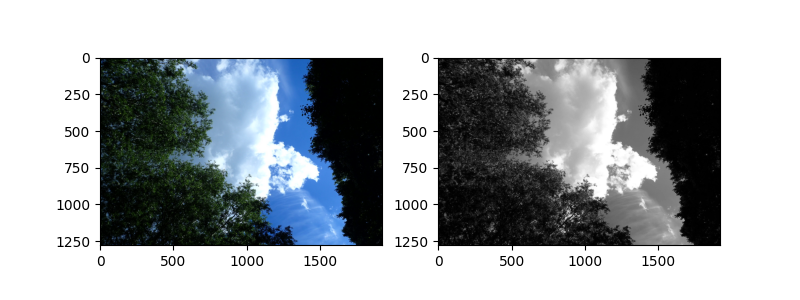

In [30]:
"""Look at the images"""
CANOPY_IMAGE = iio.imread(
    uri="../data/raw/2019-06/P6200003.JPG"
    )



CANOPY_IMAGE_IN_GRAYSCALE = skimage.color.rgb2gray(CANOPY_IMAGE)

fig, axes = pyplot.subplots(1, 2, figsize=(8, 3))  # Adjust DPI if needed
axes[0].imshow(CANOPY_IMAGE)
axes[0].axis('on')

axes[1].imshow(CANOPY_IMAGE_IN_GRAYSCALE, cmap=pyplot.cm.gray)
axes[1].axis('on')

pyplot.show()

For reference these are the available `cmap` options.

In [31]:
"""Show the color maps"""
TRUNCATED_LIST_OF_COLOR_MAPS = pyplot.cm._colormaps()[:9]
print(TRUNCATED_LIST_OF_COLOR_MAPS)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues']


Look at the histogram of the luminance distribution.

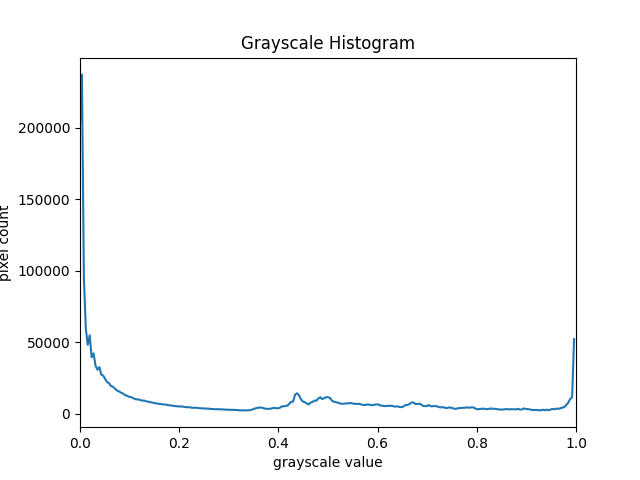

In [32]:
"""Look at the histogram."""
histogram, bin_edges = numpy.histogram(CANOPY_IMAGE_IN_GRAYSCALE, bins=256, range=(0, 1))

fig, ax = pyplot.subplots()
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0.0, 1.0])

ax.plot(bin_edges[:-1], histogram)

Create a binary mask with the threshold of 0.5 and take a look at ti.

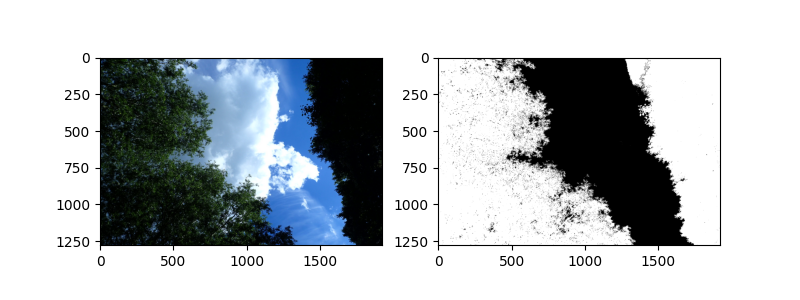

In [33]:
"""Create the binary mask"""
THRESHOLD = 0.4
BINARY_MASK = CANOPY_IMAGE_IN_GRAYSCALE < THRESHOLD

fig, axes = pyplot.subplots(1, 2, figsize=(8, 3))  # Adjust DPI if needed
axes[0].imshow(CANOPY_IMAGE)
axes[0].axis('on')

axes[1].imshow(BINARY_MASK, cmap=pyplot.cm.gray)
axes[1].axis('on')

pyplot.show()